# <b><font size=7 color='orange'> Computer Assignment 0 </font></b>

<b><font color="orange" size="6">Collaborators:</font></b><br>
<font color="orange" size="5">
  <i>Golboo Rashidi - 810100148<br>
     Mehrad Liviyan - 810101501<br>
     Pooria Mahdian - 810101530
  </i>
</font>


## Roulette Simulation and Profit Analysis


### 1. We are simulating a simple roulette betting strategy by always placing a bet on black. To do this, we defined a function called simulate_roulette(n_rounds) that uses Python’s random.choices to generate outcomes for each spin:


*   Each spin can result in +1 dollar (black) or -1 dollar (red or green).

*   The weights [18, 20] reflect that there are 18 black slots and 20 non-black slots.

*   We sum up the outcomes to get our total earnings after all spins.





In [1]:
import numpy as np
import random

def simulate_roulette(n_rounds):
    outcomes = [1, -1]
    weights = [18, 20]
    results = random.choices(outcomes, weights, k=n_rounds)
    total_earnings = sum(results)
    return total_earnings


Because of the two green slots, we generally expect a negative outcome over many plays, but individual results can vary.

In [2]:
n_rounds = 100
earnings = simulate_roulette(n_rounds)
print(f"Total earnings after {n_rounds} rounds: {earnings}")

Total earnings after 100 rounds: -10


### 2. We use a Monte Carlo simulation to study the distribution of total earnings 𝑆<sub>𝑁</sub> for various numbers of bets (𝑁 = 10, 25, 100, 1000) . In each simulation, we repeat the betting process 100,000 times.

In [3]:
def run_monte_carlo(N, n_simulation=100000):
    results = []
    for _ in range(n_simulation):
        results.append(simulate_roulette(N))
    return results

Analysis and Observations:


*   Shape of the Distribution: As 𝑁 (the number of bets) increases, the distribution of total earnings 𝑆<sub>𝑁</sub> tends to look more bell-shaped (normal-like). This aligns with the Central Limit Theorem (CLT), which says that sums of many independent, identically distributed random variables tend toward a normal distribution.
*   Expected Value: For a single bet, the probability of winning is 18/38, and losing is 20/38.
The expected value of one bet is:
$$
E(X)
= \frac{18}{38}\times (+1) + \frac{20}{38}\times (-1)
= \frac{18 - 20}{38}
= -\frac{2}{38}
= -\frac{1}{19}
\approx -0.0526.
$$ For $N$ bets, the theoretical mean (expected total) is:
$$
E(S_N) = N \times E(X).
$$
As $N$ grows, the expected total becomes more negative, reflecting the house edge. House edge is the inherent negative expected return built into the game that, over many bets, results in a steady average loss for the player.




*   Standard Deviation: The variance of a single bet $X$ is:
$$
\mathrm{Var}(X) = E(X^2) - [E(X)]^2.
$$
Since $X$ can be +1 or -1, we have $E(X^2) = 1$. Therefore,
$$
\mathrm{Var}(X)
= 1 - \left(-\frac{1}{19}\right)^2
= \frac{360}{361}.
$$
For $N$ independent bets,
$$
\mathrm{Var}(S_N)
= N \times \frac{360}{361},
\quad
\mathrm{Std}(S_N)
= \sqrt{N \times \frac{360}{361}}.
$$
In the simulation results, we see that the empirical standard deviation (from `np.std(results)`) is close to
$\sqrt{N \times \frac{360}{361}}$.

*  Normality and the CLT: For small 𝑁 (like 10 or 25), the distribution may look somewhat skewed or less smooth. As 𝑁 becomes large (like 1000), the histogram should become more bell-shaped, illustrating how the sum of many independent bets starts resembling a normal distribution.

* Interpretation: Because of the negative expected value (house edge), the center of each histogram is typically below zero.




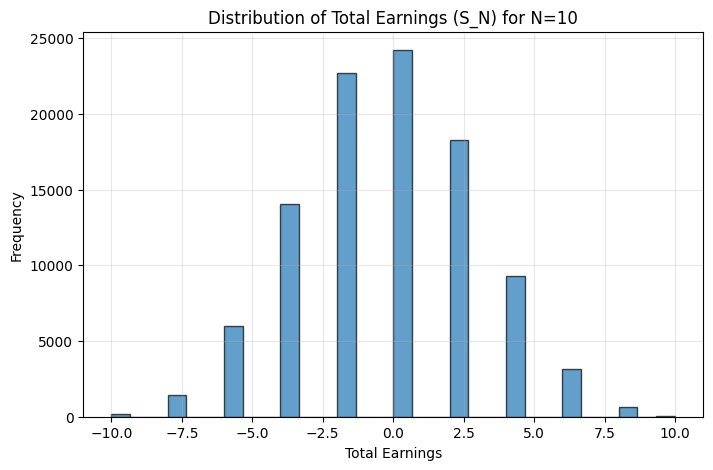

For N=10:
  Mean of total earnings = -0.527
  Standard deviation = 3.151



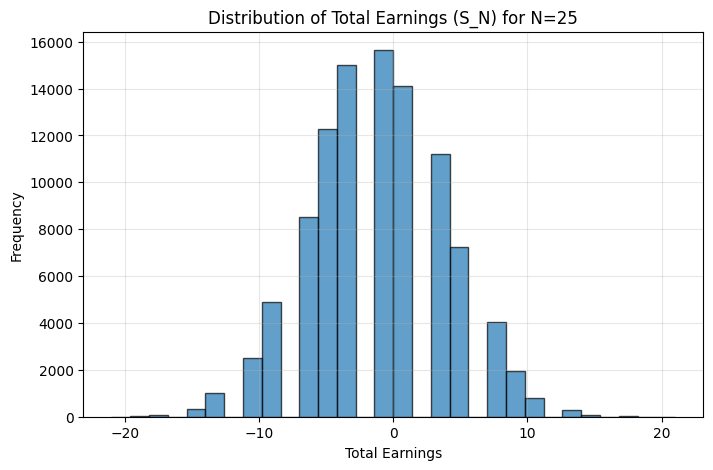

For N=25:
  Mean of total earnings = -1.298
  Standard deviation = 4.996



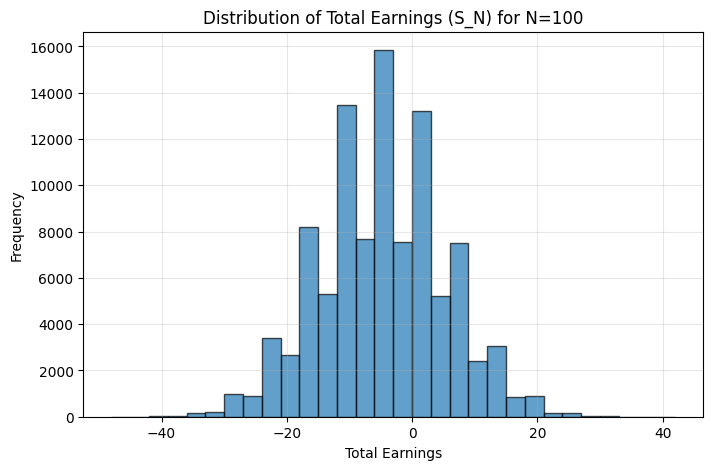

For N=100:
  Mean of total earnings = -5.261
  Standard deviation = 9.969



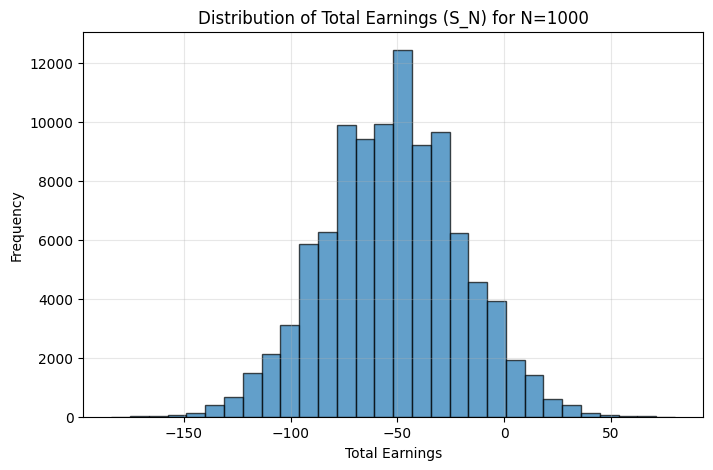

For N=1000:
  Mean of total earnings = -52.468
  Standard deviation = 31.657



In [4]:
import matplotlib.pyplot as plt

N_values = [10, 25, 100, 1000]

for N in N_values:
    results = run_monte_carlo(N, n_simulation=100000)

    plt.figure(figsize=(8,5))
    plt.hist(results, bins=30, alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of Total Earnings (S_N) for N={N}")
    plt.xlabel("Total Earnings")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.show()

    mean_val = np.mean(results)
    std_val = np.std(results, ddof=1)
    print(f"For N={N}:")
    print(f"  Mean of total earnings = {mean_val:.3f}")
    print(f"  Standard deviation = {std_val:.3f}\n")

### 3. we shift our focus from total earnings 𝑆<sub>𝑁</sub>to average winnings per bet, 𝑆<sub>𝑁</sub>/𝑁. We repeat the Monte Carlo simulations for different values of 𝑁 (10, 25, 100, 1000), but now for each simulation we divide the total earnings by 𝑁. This lets us observe how much is won or lost on average per bet, rather than in total. By plotting and analyzing the distributions of  𝑆<sub>𝑁</sub>/𝑁, we can see how the expected value of a single bet emerges more clearly and how the variability around that average shrinks as 𝑁 increases.

In [5]:
def run_monte_carlo_average(N, n_simulation=100000):
    avg_results = []
    for _ in range(n_simulation):
        total_earnings = simulate_roulette(N)
        avg_earnings = total_earnings / N
        avg_results.append(avg_earnings)
    return avg_results

Analysis and Observations:
* **Focus on Average Winnings**  
   Unlike **Question 2**, where we examined total earnings \(S_N\), here we concentrate on the average winnings per bet, $(\frac{S_N}{N}) $. This highlights how much is gained or lost on **each individual bet** rather than the cumulative total.

* **Expected Value**  
   The single-bet expected value $(\displaystyle -\frac{1}{19} \approx -0.0526)$ (and the built-in disadvantage) were already discussed in Question 2.  
   As we now divide $(S_N)$ by $(N)$, the mean of $(\frac{S_N}{N})$ naturally centers around $(-0.0526)$, aligning with the theoretical prediction.

* **Standard Error**  
   From Question 2, we know the variance of a single bet $(X)$ is approximately $(\frac{360}{361}$).  
   For the **average**, the standard deviation is:
   $$
   \sqrt{\frac{\mathrm{Var}(X)}{N}} \;=\; \sqrt{\frac{360/361}{N}}.
   $$
   Hence, as $(N)$ increases, the **distribution becomes more concentrated** around its mean.

* **Distribution Shape**  
   The **Central Limit Theorem** applies to the average of many bets, so the histograms become **bell-shaped** as $(N)$ grows. For smaller $(N)$, you see more spread in the histogram; for larger $(N)$, it clusters tightly around $(-0.0526$).

* **Interpretation**  
   Because each bet has a **negative expectation**, these average winnings center **below zero**. However, tstandard error **shrinks** with increasing $(N)$, so most simulations for large $(N)$ cluster near the expected value.

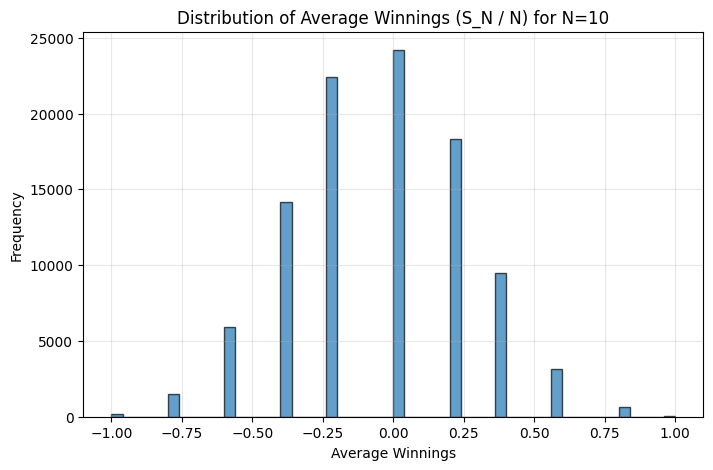

For N=10:
  Mean of average winnings = -0.0522
  Standard deviation = 0.3166



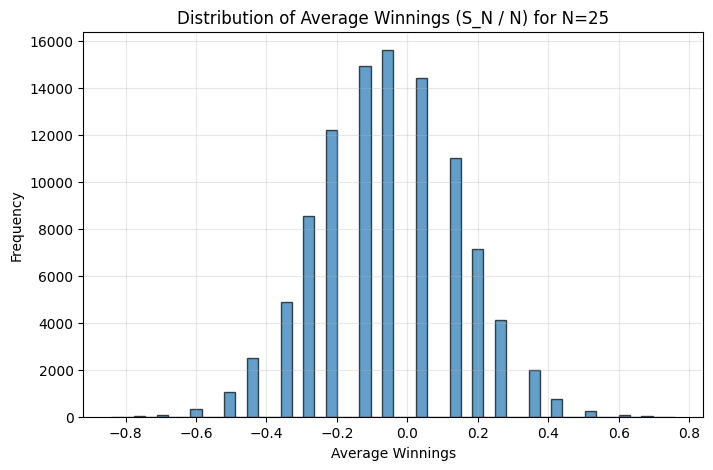

For N=25:
  Mean of average winnings = -0.0523
  Standard deviation = 0.1999



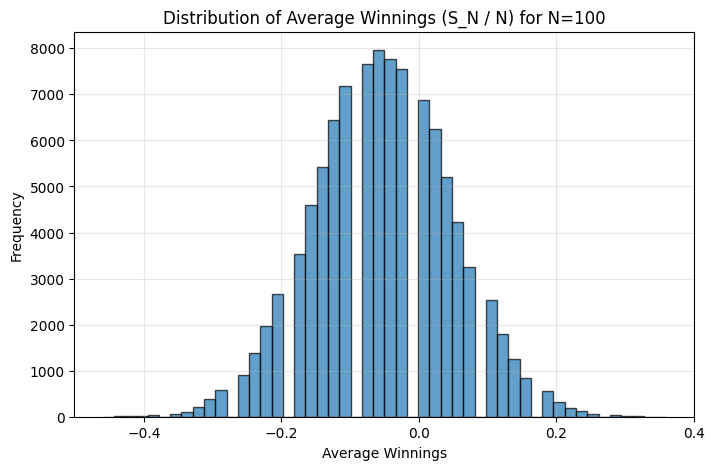

For N=100:
  Mean of average winnings = -0.0526
  Standard deviation = 0.0999



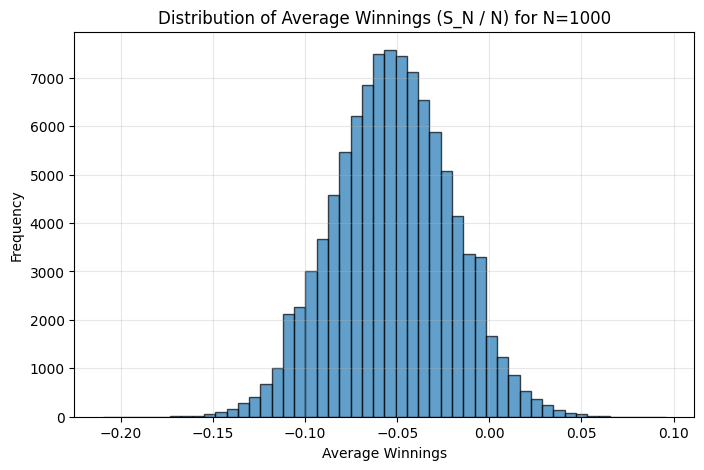

For N=1000:
  Mean of average winnings = -0.0525
  Standard deviation = 0.0317



In [6]:
N_values = [10, 25, 100, 1000]

for N in N_values:
    avg_winnings = run_monte_carlo_average(N, n_simulation=100000)

    plt.figure(figsize=(8, 5))
    plt.hist(avg_winnings, bins=50, alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of Average Winnings (S_N / N) for N={N}")
    plt.xlabel("Average Winnings")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.show()

    mean_val = np.mean(avg_winnings)
    std_val = np.std(avg_winnings, ddof=1)
    print(f"For N={N}:")
    print(f"  Mean of average winnings = {mean_val:.4f}")
    print(f"  Standard deviation = {std_val:.4f}\n")

### 4. Calculatation the theoretical expected value and standard error (standard deviation) of  𝑆<sub>𝑁</sub>/𝑁 and compare them with our Monte Carlo simulation results for each 𝑁.

In [7]:
def compare_theoretical_vs_simulation(N_values, n_sim=100000):
    for N in N_values:
        E_X = -1/19
        Var_X = 360/361
        E_SN = N * E_X
        Var_SN = N * Var_X
        Std_SN = np.sqrt(Var_SN)

        results = [simulate_roulette(N) for _ in range(n_sim)]
        empirical_mean = np.mean(results)
        empirical_std = np.std(results, ddof=1)

        print(f"Results for N={N}:")
        print(f"Theoretical Mean:  {E_SN:.4f}    | Simulated Mean:  {empirical_mean:.4f}")
        print(f"Theoretical Std:   {Std_SN:.4f}  | Simulated Std:   {empirical_std:.4f}")
        print("\n")

In [8]:
    N_values = [10, 25, 100, 1000]
    compare_theoretical_vs_simulation(N_values, n_sim=100000)

Results for N=10:
Theoretical Mean:  -0.5263    | Simulated Mean:  -0.5182
Theoretical Std:   3.1579  | Simulated Std:   3.1604


Results for N=25:
Theoretical Mean:  -1.3158    | Simulated Mean:  -1.3528
Theoretical Std:   4.9931  | Simulated Std:   4.9932


Results for N=100:
Theoretical Mean:  -5.2632    | Simulated Mean:  -5.2698
Theoretical Std:   9.9861  | Simulated Std:   9.9828


Results for N=1000:
Theoretical Mean:  -52.6316    | Simulated Mean:  -52.7548
Theoretical Std:   31.5789  | Simulated Std:   31.5307




Comparison of Theoretical and Monte Carlo Results:

* **Negative Expected Value**

   A single bet on black in American roulette has:
   $$
   E(X) \;=\; \frac{18}{38}\cdot (+1) \;+\; \frac{20}{38}\cdot (-1)
   \;=\; -\frac{1}{19} \approx -0.0526.
   $$
   For \(N\) bets, the theoretical mean is:
   $$
   E(S_N) \;=\; N \times E(X) \;=\; -\frac{N}{19}.
   $$
   The simulation results confirm this negative trend, as the **empirical means** closely match $(-\tfrac{N}{19})$ for each N.

* **Growing Standard Deviation**

   Since each bet can be +1 or -1, the variance of one bet is:
   $$
   \mathrm{Var}(X) \;=\; E(X^2) - [E(X)]^2
   \;=\; 1 - \left(-\frac{1}{19}\right)^2
   \;=\; \frac{360}{361}.
   $$
   Therefore, for N independent bets:
   $$
   \mathrm{Var}(S_N)
   \;=\; N \times \mathrm{Var}(X)
   \;=\; N \times \frac{360}{361},
   \quad
   \mathrm{Std}(S_N)
   \;=\; \sqrt{N \times \frac{360}{361}}.
   $$
   The empirical standard deviations from the simulation align well with these theoretical values. Any small deviations again reflect **finite sample variation**.

* **Sampling Noise and Convergence**

   With 100000 simulation runs per N, the **Law of Large Numbers** and **Central Limit Theorem** ensure that the **empirical** means and standard deviations **converge** to their theoretical counterparts. If the simulation count increases further, the gap between theoretical and simulated values will typically become **even smaller**.

* **Interpretation**

   - The **negative mean** indicates a long-run loss for the player.
   - The **standard deviation** grows proportionally to $\sqrt{N}$, so while the **average** loss becomes more pronounced with larger N, the possible range of outcomes also becomes wider.
   - Overall, the results validate the theoretical predictions: each additional bet contributes an average of $-\tfrac{1}{19}$ dollars to one’s total, and the **variability** in total earnings is governed by the variance of individual bets scaled by N.
   
By comparing these metrics side by side, we see that **the theory** and **the simulation** are in close agreement, confirming the mathematics behind American roulette’s slight negative expectation.


### 5. First we approximate the probability (using the Central Limit Theorem) that the casino loses money (i.e., you win overall) after N=25 bets. Then we verify this approximation with a Monte Carlo simulation.

In [ ]:
from scipy.stats import norm

E_X = -1/19
Var_X = 360/361
N = 25

def clt_probability(N):
    mu = N * E_X
    sigma = np.sqrt(N * Var_X)
    z_value = (0 - mu) / sigma  # (threshold - mean) / std
    probability = 1 - norm.cdf(z_value)
    return probability

print(f"CLT Approximation: {clt_probability(25):.3f}")

CLT Approximation: 0.396


In [ ]:
count_positive = 0
for _ in range(100000):
    total_earnings = simulate_roulette(25)
    if total_earnings > 0:
        count_positive += 1

monte_carlo_probability = count_positive / 100000
print(f"Monte Carlo Probability that Casino Loses = {monte_carlo_probability:.4f}")

Monte Carlo Probability that Casino Loses = 0.3942


We used the Central Limit Theorem (CLT) to approximate the probability that the casino loses money after 25 bets on black. By the CLT, $S_{25}$ is approximately normal with:

$$
\mu = N \times E(X),
\quad
\sigma = \sqrt{N \times \mathrm{Var}(X)},
$$

where $E(X) = -\tfrac{1}{19}$ and $\mathrm{Var}(X) = \tfrac{360}{361}$. with $N=25$, we find:

$$
P(S_{25} > 0)
= 1 - \Phi\!\Bigl(\frac{-\mu}{\sigma}\Bigr)
\approx 0.396
\; (39.6\%).
$$

We then ran a **Monte Carlo simulation** (100,000 trials), repeatedly summing 25 spins per trial and counting how often $S_{25} > 0$. This yielded an empirical probability of **0.3942** (39.42%), which closely matches the CLT approximation. Minor differences arise from **sampling noise**.

### 6.  Plotting the probability that the casino loses money

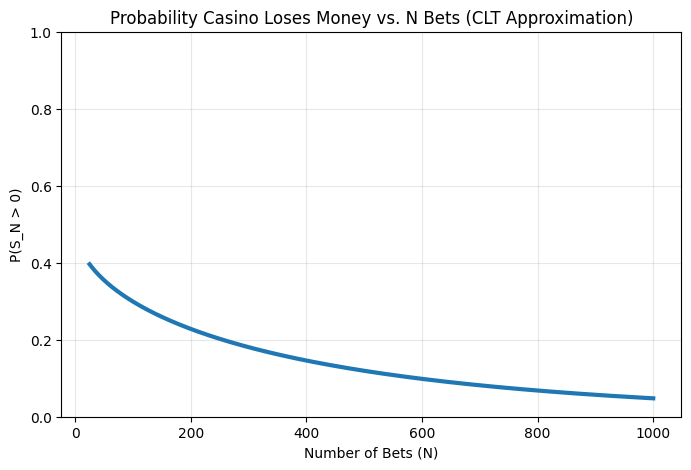

In [ ]:
N_values = range(25, 1001)
probabilities = [clt_probability(N) for N in N_values]

plt.figure(figsize=(8, 5))
plt.plot(N_values, probabilities,linewidth=3)
plt.title("Probability Casino Loses Money vs. N Bets (CLT Approximation)")
plt.xlabel("Number of Bets (N)")
plt.ylabel("P(S_N > 0)")
plt.grid(True, alpha=0.3)
plt.ylim([0, 1])
plt.show()

Observed Trend

* **Short Run**  
   - For small N (around 25), the probability of ending with more than \$0 can be **30–40\%**, indicating notable **variability** when only a few bets are made.

* **Long Run**  
   - As N grows, the curve **slopes downward**, pushing the probability well below 20% by the time you reach a few hundred bets.  
   - This is due to the **negative expected value** of each bet. By the Law of Large Numbers, more bets make it increasingly likely that total earning settles below zero.
Mathematically, if each bet \(X_i\) has
$$
E(X) \;=\; -\frac{1}{19},
\quad
\mathrm{Var}(X) \;=\; \frac{360}{361},
$$
then the sum of \(N\) bets,
$$
S_N \;=\; \sum_{i=1}^N X_i,
$$
has
$$
\mu \;=\; N \times E(X)
\quad\text{and}\quad
\sigma \;=\; \sqrt{\,N \times \mathrm{Var}(X)\,}.
$$
By the CLT,
$$
S_N \;\approx\; \mathcal{N}(\mu,\,\sigma^2),
\quad
P(S_N > 0) \;=\; 1 - \Phi\!\Bigl(\frac{0 - \mu}{\sigma}\Bigr).
$$
Since $\mu$ becomes more negative with larger N, the probability
$P(S_N > 0)$ steadily **decreases** as N grows.

Why Casinos Encourage More Betting

* **Short-Term Variance:** With fewer bets, there remains a considerable chance (30–40%) that a player might walk away in profit, generating excitement and the illusion of easy gains.  
* **Long-Term Convergence:** As N becomes large, the probability of the player finishing above $0 goes down. The house is more likely to realize its statistical advantage the longer a player plays.

## Predicting the Outcome of the 2016 USA Presidential Election

### 1.First we load the data into a pandas dataframe.And then we drop the rows where 'Number of Observations' is NaN.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

path = '/content/drive/My Drive/DS-Data/CA0/2016-general-election-trump-vs-clinton.csv'
df = pd.read_csv(path)

The total number of voters who are supporting Clinton is calculated and the confidence interval is computed.

In [ ]:
df['Number of Observations'] = pd.to_numeric(df['Number of Observations'])
df['Trump'] = pd.to_numeric(df['Trump'])
df['Clinton'] = pd.to_numeric(df['Clinton'])
N = df['Number of Observations'].sum()
x_clinton = (df['Clinton'] / 100 * df['Number of Observations']).sum()

p_hat = x_clinton / N
se = np.sqrt(p_hat * (1 - p_hat) / N)

z_score = norm.ppf(0.975)
i_lower = p_hat - z_score * se
i_upper = p_hat + z_score * se
print(f"Estimated proportion of Clinton supporters: {p_hat:.4f}")
print(f"95% Confidence Interval: ({i_lower:.4f}, {i_upper:.4f})")

Estimated proportion of Clinton supporters: 0.4561
95% Confidence Interval: (0.4554, 0.4568)


### 2.Here we perform a Monte Carlo simulation to show that knowing the true proportion of Clinton supporters, the confidence interval will capture the true value about 95% of the time. To do that we will run 10^5 simulations and for each one we will generate N = 30 random samples from the binomial distribution with a 47% chance of getting 1 and 53% chance of getting 0. Then we calculate the upper and lower boundaries of the confidence interval and check if the **true proportion(p = 0.47)** falls inside it.

In [ ]:
def monte_carlo_simulation(p_true=0.47, N=30, iterations=100000):
    capture_count = 0

    for _ in range(iterations):
        sample = np.random.binomial(N, p_true) / N
        se = np.sqrt(sample * (1 - sample) / N)
        ci_lower = sample - z_score * se
        ci_upper = sample + z_score * se

        if ci_lower <= p_true <= ci_upper:
            capture_count += 1

    capture_rate = capture_count / iterations
    print(f"CI captures true proportion {p_true} approximately {capture_rate:.4f} of the time")
    return capture_rate

In [ ]:
capture_rate = monte_carlo_simulation()

CI captures true proportion 0.47 approximately 0.9323 of the time


### 3.The new dataframe 'df_filtered' contains 6 columns as shown below.

In [ ]:
df_filtered = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']]

print(df_filtered.head())

   Trump  Clinton       Pollster  Start Date  Number of Observations  \
0   41.0     45.0  Insights West  2016-11-04                   940.0   
1    6.0     89.0  Insights West  2016-11-04                     NaN   
2   82.0      7.0  Insights West  2016-11-04                     NaN   
3   38.0     43.0  Insights West  2016-11-04                     NaN   
4   43.0     41.0       IBD/TIPP  2016-11-04                  1107.0   

         Mode  
0    Internet  
1    Internet  
2    Internet  
3    Internet  
4  Live Phone  


### 4.To create a time-series plot we first sort the dates in the dataset.

In [ ]:
df_filtered.loc[:, "Start Date"] = pd.to_datetime(df_filtered["Start Date"])
df_filtered = df_filtered.sort_values(by="Start Date")

Here's the time-series plot for Trump and Clinton's support percentages over time.

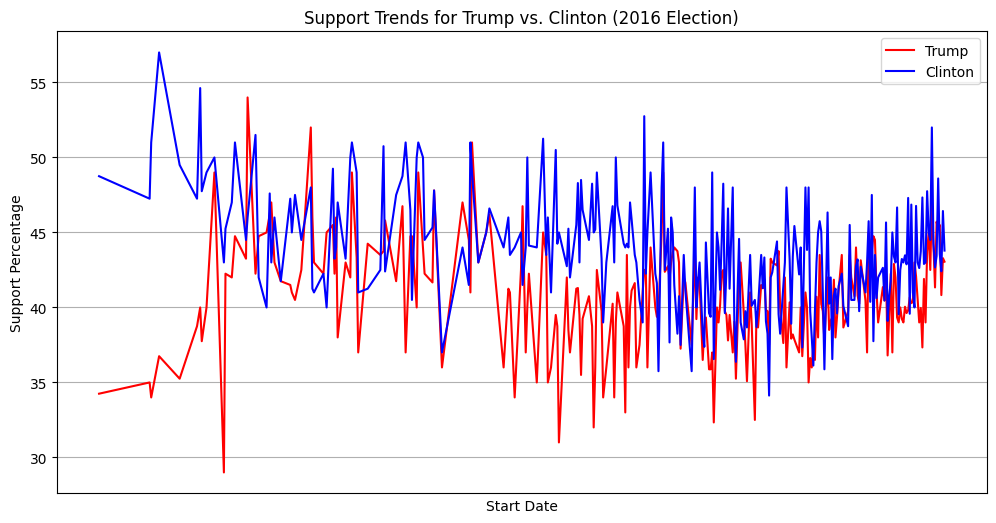

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered["Start Date"], y=df_filtered["Trump"], label="Trump", color="red", errorbar=None)
sns.lineplot(x=df_filtered["Start Date"], y=df_filtered["Clinton"], label="Clinton", color="blue", errorbar=None)

plt.xticks([], [])
plt.ylabel("Support Percentage")
plt.title("Support Trends for Trump vs. Clinton (2016 Election)")
plt.legend()
plt.grid(True)
plt.show()

Here the rolling average of the same data is used to better visualize the support trend for the candidates.

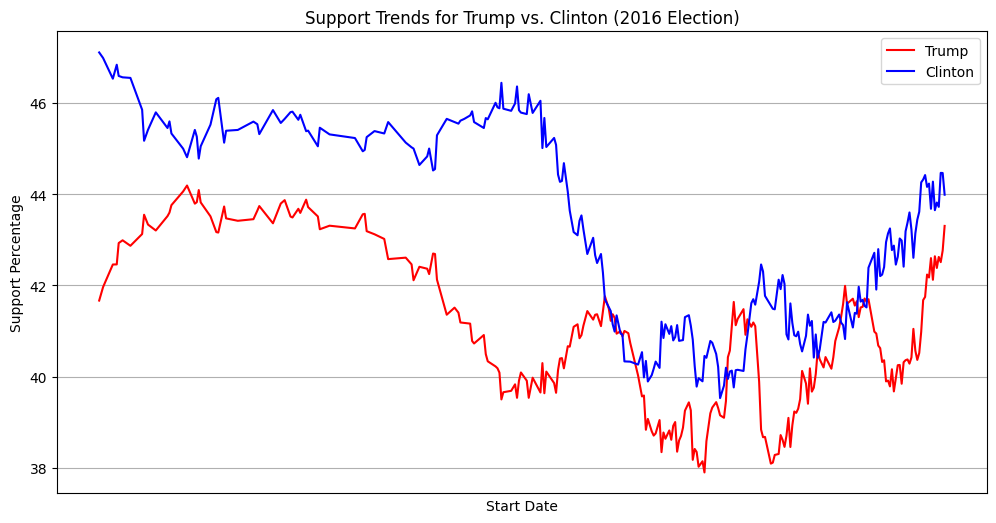

In [ ]:
df_filtered["Trump_Smoothed"] = df_filtered["Trump"].rolling(window=100, center=True).mean()
df_filtered["Clinton_Smoothed"] = df_filtered["Clinton"].rolling(window=100, center=True).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered["Start Date"], y=df_filtered["Trump_Smoothed"], label="Trump", color="red", errorbar=None)
sns.lineplot(x=df_filtered["Start Date"], y=df_filtered["Clinton_Smoothed"], label="Clinton", color="blue", errorbar=None)

plt.xticks([], [])
plt.ylabel("Support Percentage")
plt.title("Support Trends for Trump vs. Clinton (2016 Election)")
plt.legend()
plt.grid(True)
plt.show()


### 5.Here the total number of voters is calculated based on the total number of observations.

In [ ]:
total_voters = int(df['Number of Observations'].sum())
print(f"Total number of voters observed: {total_voters}")

Total number of voters observed: 1940931


### 6.The estimated proportion of Trump snd Clinton supporters is calculated and shown in a table.

In [ ]:
x_trump = (df['Trump'] / 100 * df['Number of Observations']).sum()
p_trump = x_trump / total_voters
p_clinton = x_clinton / total_voters

data = {"Candidate": ["Trump", "Clinton"], "Estimated Proportion": [p_trump, p_clinton]}
df_proportions = pd.DataFrame(data)
print(df_proportions)

  Candidate  Estimated Proportion
0     Trump              0.405834
1   Clinton              0.456121


### 7.Here a 95% confidence interval for both Trump and Clinton support proportions is calculated.

In [ ]:
se_clinton = np.sqrt(p_clinton * (1 - p_clinton) / total_voters)
se_trump = np.sqrt(p_trump * (1 - p_trump) / total_voters)
i_lower_clinton = p_clinton - z_score * se_clinton
i_upper_clinton = p_clinton + z_score * se_clinton
i_lower_trump = p_trump - z_score * se_trump
i_upper_trump = p_trump + z_score * se_trump

print(f"Estimated proportion of Clinton supporters: {p_clinton:.4f}")
print(f"95% Confidence Interval: ({i_lower_clinton:.4f}, {i_upper_clinton:.4f})")
print(f"Estimated proportion of Trump supporters: {p_trump:.4f}")
print(f"95% Confidence Interval: ({i_lower_trump:.4f}, {i_upper_trump:.4f})")

Estimated proportion of Clinton supporters: 0.4561
95% Confidence Interval: (0.4554, 0.4568)
Estimated proportion of Trump supporters: 0.4058
95% Confidence Interval: (0.4051, 0.4065)


### 8. a)First we calculate the 95% confidence interval for the spread, using the given formula

In [ ]:
d_hat = 2 * p_hat - 1

SE_p_hat = np.sqrt(p_hat * (1 - p_hat) / total_voters)

SE_d_hat = 2 * SE_p_hat
z_score = 1.96
CI_lower = d_hat - z_score * SE_d_hat
CI_upper = d_hat + z_score * SE_d_hat

print("Estimated Spread (d):", d_hat)
print("95% CI for Spread: [", CI_lower, ",", CI_upper, "]")

Estimated Spread (d): -0.08775837987027868
95% CI for Spread: [ -0.08915981236527412 , -0.08635694737528324 ]


### b)Then we conduct a two-tailed hypothesis test to see whether the value of d is significantly different from 0.

In [ ]:
test_statistic = d_hat / SE_d_hat
p_value = 2 * (1 - norm.cdf(abs(test_statistic)))

In [ ]:
print("Test Statistic (Z-score):", test_statistic)
print("P-value:", p_value)

Test Statistic (Z-score): -122.73614687827322
P-value: 0.0


## Drug Safety Test

First of all we should mount our notebook to our google drive to upload the csv file.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### 1. Load the drug_safety.csv into a Pandas DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv("./sample_data/drug_safety.csv")

show the head of our data:

In [ ]:
df.head()

and this is the shape of our data:

In [ ]:
df.shape

### 2. Remove samples that contain nan whenever it is needed.


In [ ]:
df.isna().sum()

as we can see we have nan values only on wbc and rbc columns so we need to delete those rows or replace the nan values to the mean of the columns.

In [ ]:
dfWithRemoveingNanRows = df.dropna()
df["wbc"] = df["wbc"].fillna(df['wbc'].mean())
df["rbc"] = df["rbc"].fillna(df['rbc'].mean())
dfWithReplaceTheMeanCols = df

In [ ]:
dfWithRemoveingNanRows.shape

In [ ]:
dfWithRemoveingNanRows.head()

In [ ]:
dfWithReplaceTheMeanCols.shape

In [ ]:
dfWithReplaceTheMeanCols.head()

### 3. Display basic statistics (e.g., mean, standard deviation) for numeric columns.

In [ ]:
dfWithRemoveingNanRows.describe()

In [ ]:
dfWithReplaceTheMeanCols.describe()

### 4. Group the dataset by trx (Drug vs. Placebo) and summarize key statistics for wbc, rbc, and num_effects.

first do the partitioning for remove rows data:

In [ ]:
dfWithRemoveingNanRowsDrug = dfWithRemoveingNanRows[dfWithRemoveingNanRows["trx"] == "Drug"]
dfWithRemoveingNanRowsPlacebo = dfWithRemoveingNanRows[dfWithRemoveingNanRows["trx"] == "Placebo"]

In [ ]:
dfWithRemoveingNanRowsDrug[["wbc", "rbc", "num_effects"]].describe()

In [ ]:
dfWithRemoveingNanRowsDrug.head()

In [ ]:
dfWithRemoveingNanRowsPlacebo[["wbc", "rbc", "num_effects"]].describe()

In [ ]:
dfWithRemoveingNanRowsPlacebo.head()

second do the partitioning for replaceing data:

In [ ]:
dfWithReplaceTheMeanColsDrug = dfWithReplaceTheMeanCols[dfWithReplaceTheMeanCols["trx"] == "Drug"]
dfWithReplaceTheMeanColsPlacebo = dfWithReplaceTheMeanCols[dfWithReplaceTheMeanCols["trx"] == "Placebo"]

In [ ]:
dfWithReplaceTheMeanColsDrug[["wbc", "rbc", "num_effects"]].describe()

In [ ]:
dfWithReplaceTheMeanColsDrug.head()

In [ ]:
dfWithReplaceTheMeanColsPlacebo[["wbc", "rbc", "num_effects"]].describe()

In [ ]:
dfWithReplaceTheMeanColsPlacebo.head()

### 5. Change adverse_effects column so that you can define mean for it.

we will use binary values for yes or no : yes = 1, no = 0

In [ ]:
dfWithRemoveingNanRowsDrug.loc[dfWithRemoveingNanRowsDrug["adverse_effects"] == "No", "adverse_effects"] = 0.0
dfWithRemoveingNanRowsDrug.loc[dfWithRemoveingNanRowsDrug["adverse_effects"] == "Yes", "adverse_effects"] = 1.0
dfWithRemoveingNanRowsPlacebo.loc[dfWithRemoveingNanRowsPlacebo["adverse_effects"] == "No", "adverse_effects"] = 0.0
dfWithRemoveingNanRowsPlacebo.loc[dfWithRemoveingNanRowsPlacebo["adverse_effects"] == "Yes", "adverse_effects"] = 1.0
dfWithReplaceTheMeanColsDrug.loc[dfWithReplaceTheMeanColsDrug["adverse_effects"] == "No", "adverse_effects"] = 0.0
dfWithReplaceTheMeanColsDrug.loc[dfWithReplaceTheMeanColsDrug["adverse_effects"] == "Yes", "adverse_effects"] = 1.0
dfWithReplaceTheMeanColsPlacebo.loc[dfWithReplaceTheMeanColsPlacebo["adverse_effects"] == "No", "adverse_effects"] = 0.0
dfWithReplaceTheMeanColsPlacebo.loc[dfWithReplaceTheMeanColsPlacebo["adverse_effects"] == "Yes", "adverse_effects"] = 1.0


In [ ]:
dfWithRemoveingNanRowsDrug["adverse_effects"] = dfWithRemoveingNanRowsDrug["adverse_effects"].astype(float)
dfWithRemoveingNanRowsPlacebo["adverse_effects"] = dfWithRemoveingNanRowsPlacebo["adverse_effects"].astype(float)
dfWithReplaceTheMeanColsDrug["adverse_effects"] = dfWithReplaceTheMeanColsDrug["adverse_effects"].astype(float)
dfWithReplaceTheMeanColsPlacebo["adverse_effects"] = dfWithReplaceTheMeanColsPlacebo["adverse_effects"].astype(float)

In [ ]:
dfWithRemoveingNanRowsDrug.head()

In [ ]:
dfWithRemoveingNanRowsPlacebo.head()

In [ ]:
dfWithReplaceTheMeanColsDrug.head()

In [ ]:
dfWithReplaceTheMeanColsPlacebo.head()

we can see the adverse_effects gets binary values 0 for No and 1 for yes.

lets see the mean:

In [ ]:
dfWithRemoveingNanRowsDrug.describe()

In [ ]:
dfWithRemoveingNanRowsPlacebo.describe()

In [ ]:
dfWithReplaceTheMeanColsDrug.describe()

In [ ]:
dfWithReplaceTheMeanColsPlacebo.describe()

### 6. For each metric below, determine if they differ significantly between the Drug and Placebo groups?

The null hypothesis (H0):

 There is no significant difference between the Drug and Placebo groups.

The alternative hypothesis (H1):

 There is a significant difference between the Drug and Placebo groups.

***Note :*** we will use levene's test to determin if two groups have equal variance or not and it is used as the parameter of equal_var to choise the better type of t-test.



If the result of levene's test is lower than 0.05 (significant level) it means that the data have unequal variance and if not it means that the data have equal variance.

we make a tester for easy use:

In [ ]:
from scipy.stats import ttest_ind, levene


class T_TESTER:
  def __init__(self, significantLevel_, typeOfTest_, metrics_):
     self.significantLevel = significantLevel_
     self.typeOfTest = typeOfTest_
     self.results = []
     self.metrics = metrics_

  def test(self, df1, df2, title):
    leveneStatistisc, levenePValue = levene(df1[title], df2[title])

    equalVar = levenePValue > self.significantLevel

    t_testStatistic, t_testPValue = ttest_ind(df1[title], df2[title], equal_var=equalVar, alternative=self.typeOfTest)

    self.results.append({
      "Metric":title,
      "leveneStatistisc": leveneStatistisc,
      "levenePValue": levenePValue,
      "equalVar": equalVar,
      "t_testStatistic": t_testStatistic,
      "t_testPValue": t_testPValue
    })


  def showResult(self, result):
    print("Metric : ", result["Metric"])
    print("leveneStatistisc : ", result["leveneStatistisc"])
    print("levenePValue : ", result["levenePValue"])
    print("equalVar : ", result["equalVar"])
    print("t_testStatistic : ", result["t_testStatistic"])
    print("t_testPValue : ", result["t_testPValue"])
    if result["t_testPValue"] < self.significantLevel:
      print("Reject the null hypothesis (H0) and we can reject that they don't have significant difference so it means that these two groups have significant difference")
    else:
      print("Fail to reject the null hypothesis (H0), we cannot say that they have don't have significant difference")
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")



  def showResults(self):
    for result in self.results:
      self.showResult(result)

  def startTest(self, df1, df2):
    for metric in self.metrics:
      self.test(df1, df2, metric)
    self.showResults()


#### a. mean white blood cell count

The null hypothesis (H0):

> mean of wbc in drug group = mean of wbc in placebo group




The alternative hypothesis (H1):

> mean of wbc in drug group > mean of wbc in placebo group

or

> mean of wbc in drug group < mean of wbc in placebo group  


#### b. mean red blood cell count

The null hypothesis (H0):

> mean of rbc in drug group = mean of rbc in placebo group




The alternative hypothesis (H1):

> mean of rbc in drug group > mean of rbc in placebo group

or

> mean of rbc in drug group < mean of rbc in placebo group  


#### c. mean num effects

The null hypothesis (H0):

> mean of num effects in drug group = mean of num effects in placebo group




The alternative hypothesis (H1):

> mean of num effects in drug group > mean of num effects in placebo group

or

> mean of num effects in drug group < mean of num effects in placebo group  


#### d. mean adverse effect

The null hypothesis (H0):

> mean of adverse effect in drug group = mean of adverse effect in placebo group




The alternative hypothesis (H1):

> mean of adverse effect in drug group > mean of adverse effect in placebo group

or

> mean of adverse effect in drug group < mean of adverse effect in placebo group  


#### significant level = 0.05

##### setup config

In [ ]:
significantLevel = 0.05
typeOfTest = "two-sided"
metrics = ["wbc", "rbc", "num_effects", "adverse_effects"]

##### use data that remove nan rows:

first of all we will test on the data that we remove the nan rows:

In [ ]:
tester = T_TESTER(significantLevel, typeOfTest, metrics)
tester.startTest(dfWithRemoveingNanRowsDrug, dfWithRemoveingNanRowsPlacebo)

##### use data that replace nan rows with mean:

In [ ]:
tester = T_TESTER(significantLevel, typeOfTest, metrics)
tester.startTest(dfWithReplaceTheMeanColsDrug, dfWithReplaceTheMeanColsPlacebo)

#### significant level = 0.1

##### setup config

In [ ]:
significantLevel = 0.1
typeOfTest = "two-sided"
metrics = ["wbc", "rbc", "num_effects", "adverse_effects"]

##### use data that remove nan rows:

In [ ]:
tester = T_TESTER(significantLevel, typeOfTest, metrics)
tester.startTest(dfWithRemoveingNanRowsDrug, dfWithRemoveingNanRowsPlacebo)

##### use data that replace nan rows with mean:

In [ ]:
tester = T_TESTER(significantLevel, typeOfTest, metrics)
tester.startTest(dfWithReplaceTheMeanColsDrug, dfWithReplaceTheMeanColsPlacebo)

#### summary

##### If we set the p-value significant level to 0.05, which tests will fail? What about 0.1?

As we see if we set p-value significant level to 0.05 , non of test will fail and we can say that drug doesn't have significant difference on those who take it in any of tests.

But we set p-value significant level to 0.1 then only rbc test will fail and reject H0 so we can say the drug only have significant difference on rbc mean.

##### What does this significant level mean?

The significance level is like a cutoff that helps decide if a result is real or just happened by chance.

If our caculated value is lower than significant level it means that we can reject the H0 but if the value is higher than significant level then we can say that we fail to reject H0 ( not to accept it ).

##### What is the alternative argument and what did you choose for each metric, why?

assume that H0 : mean Drug = mean Placebo


alternative argument can accept three value :

Two-sided =>  H1: mean Drug > mean Placebo or mean Placebo > mean Drug   (check if there is any diffrence)

greater => H1 : mean Drug > mean Placebo (check if Drug mean greater than Placebo mean)

less => H1 : mean Drug < mean Placebo (check if Drug mean lower
than Placebo mean)

In all those cases because we need to check if is there any significant difference between these two groups so we will use two-sided in all cases but for example if we want to check if drug persons have higher rbc or wbc mean than placebo persons, we should use greater or if we want to check if drug persons have lower num_effects or adverse_effects than placebo persons, we should use less.

In both those examples are the cases that we want to use that drug have good effects but in the problem we want to use we only need to check that we have significant difference or not.

##### What is the equal_var argument and what does it do?

The equal_var argument that we use as a argument in t-test can get two value : true or false.

If we say equal_var = True that means the both group have similar variance then it will use the regular t-test.

And if we say equal_var = False then it means that the groups have different variance dso we can use welch's t-test which is more safe if the groups have different variances.

**Note:** the default value for equal var is true.

we can check if both groups have similar variance or not with leven's test.

**Example:**

Imagine you are comparing test scores from two classes:

If both classes have similar score spreads, use equal_var=True.
If one class has much more spread out scores than the other, use equal_var=False.

## Bonus

### Question:

If we construct an approximate 95% confidence interval for µ, this interval was
constructed for one of the following purposes. Indicate which is correct and explain why:
1. To estimate the average of the 100 pressure measurements and give ourselves some
room for error in the estimate.
2. To estimate the true average pressure of the pipeline and give ourselves some room
for error in the estimate.
3. To provide a range in which 95 of the 100 pressure measurements are likely to have
fallen.
4. To provide a range in which 95% of all possible pressure measurements are likely to
fall.


### Answer:

**2** is correct. A 95% confidence interval for 𝜇 is specifically meant to capture the unknown true average pressure with 95% confidence, rather than to describe individual measurements.

Option **1** is incorrect because it is just describing the sample mean. A confidence interval for 𝜇 is about the population mean, not just the observed sample mean. Also the confidence interval is used to estimate the true average pressure, not the average of the pressure measurements. (A confidence interval is not meant to estimate the average of the 100 measurements; instead, it estimates the population mean μ.)

Options **3** and **4** both suggest that the value of an individual pressure measurement will fall inside the confidence interval, but the confidence interval is an estimate for the true average (mean) of the pressure measurements. To estimate the value of an individual pressure measurement, we can use a Prediction Interval.